In [1]:
from zfish.utils import *
from zfish.local_path import *
from zfish.importEphys import import12chFlt

code_id = "5001 - Linear Track Swim Speed"
loc = join(figpath, code_id)
mkdir(loc)
pass

        D:\Yao Shuyang\En Lab\Results\5001 - Linear Track Swim Speed is already existed!


In [2]:
def swim_speed(dir_path):
    res = import12chFlt(dir_path)
    
    data = {
        "Trial": [],
        "Gratings": [],
        "Average Speed": []
    }
    
    for trial in np.unique(res['n_trials']):
        if trial <= 4:
            continue
        idx = np.where(res['n_trials'] == trial)[0]
        pos = res['behav_pos'][idx]
        t = res['in_trial_time'][idx]
        
        idx0 = np.where((pos <= 25))[0]
        idx1 = np.where((pos > 25) & (pos <= 55))[0]
        idx2 = np.where((pos > 55) & (pos <= 85))[0]
        idx3 = np.where((pos >= 98))[0]
        
        t1 = t[idx1[0]] - t[idx0[0]]
        t2 = t[idx2[0]] - t[idx1[0]]
        t3 = t[idx2[-1]] - t[idx2[0]]
        
        data['Trial'].append(np.repeat(trial, 3))
        data['Gratings'].append(np.array(["Green", "Blue", "Red"]))
        data['Average Speed'].append([25/t1, 30/t2, 30/t3])
    
    for key in data:
        data[key] = np.concatenate(data[key])
    return data

data = {
    "Gratings": [],
    "Average Speed": [],
    "Session": []
}
for i in tqdm([14, 18, 21, 22, 24]):
    res = swim_speed(ff1['Ephys path'][i])
    
    idx_green = np.where(res['Gratings'] == "Green")[0]
    idx_blue = np.where(res['Gratings'] == "Blue")[0]
    idx_red = np.where(res['Gratings'] == "Red")[0]
    
    data['Gratings'].append(np.array(["Green", "Blue", "Red"]))
    data['Average Speed'].append([
        np.mean(res['Average Speed'][idx_green]), 
        np.mean(res['Average Speed'][idx_blue]), 
        np.mean(res['Average Speed'][idx_red])
    ])
    data['Session'].append(np.repeat(i, 3))

for key in data:
    data[key] = np.concatenate(data[key])

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


TtestResult(statistic=-0.8398967811501284, pvalue=0.4482354113772899, df=4)
TtestResult(statistic=2.2074185270325355, pvalue=0.09188989686553944, df=4)
TtestResult(statistic=2.1934598284428293, pvalue=0.09333099588701159, df=4)


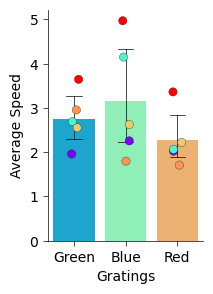

In [4]:
plt.figure(figsize=(2, 3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x='Gratings',
    y='Average Speed', 
    hue='Session',
    data=data,
    palette="rainbow",
    size=6,
    edgecolor='k',
    linewidth=0.2,
    jitter=True,
    color='k',
    ax=ax,
    legend=False
)
sns.barplot(
    x='Gratings',
    y='Average Speed', 
    data=data,
    hue='Gratings',
    palette="rainbow",
    ax=ax,
    capsize=0.3, 
    err_kws={'color':'k', 'linewidth': 0.5}
)
idx_green = np.where(data['Gratings'] == "Green")[0]
idx_blue = np.where(data['Gratings'] == "Blue")[0]
idx_red = np.where(data['Gratings'] == "Red")[0]

print(ttest_rel(data['Average Speed'][idx_green], data['Average Speed'][idx_blue]))
print(ttest_rel(data['Average Speed'][idx_green], data['Average Speed'][idx_red]))
print(ttest_rel(data['Average Speed'][idx_blue], data['Average Speed'][idx_red]))